In [2]:
#Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix
from sklearn import tree

In [3]:
#Loading in the Data
df = pd.read_csv("./water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Exploring the Dataset

In [4]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
#Analyzing Data
display(df.describe())
print(df.info())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [6]:
#Checking to see any missing values
df.isnull().sum().sort_values(ascending=False)

Sulfate            781
ph                 491
Trihalomethanes    162
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64

In [7]:
#Filling in the missing values

#Filling NaN pH Values
df["ph"].fillna(value = df["ph"].mean(), inplace = True)

#Filling NaN Sulfate Values
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)

#Filling NaN Trihalomethanes Values
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

In [8]:
#Checking any left NaN value
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Visualizing the Dataset

In [9]:
import seaborn as sn
from matplotlib.pyplot import figure

plt.style.use('dark_background')

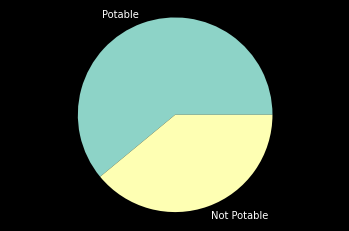

In [10]:
fig, ax = plt.subplots()
ax.pie(df.groupby('Potability').size(), labels=['Potable', 'Not Potable'])
ax.axis('equal')
plt.show()

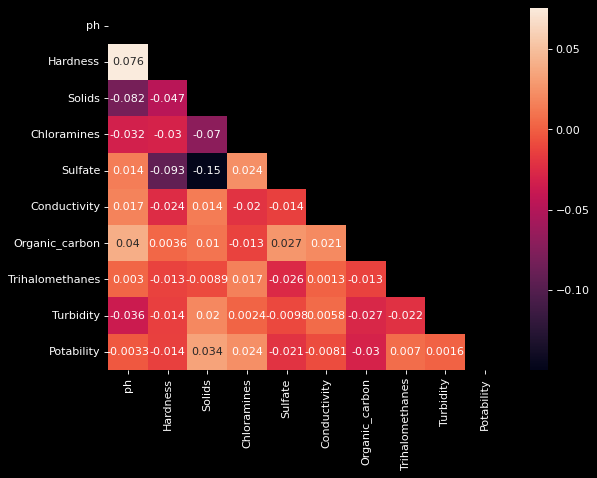

In [12]:
figure(figsize=(8, 6), dpi=80)
sn.heatmap(df.corr(), mask=np.triu(df.corr()), annot=True)
plt.show()

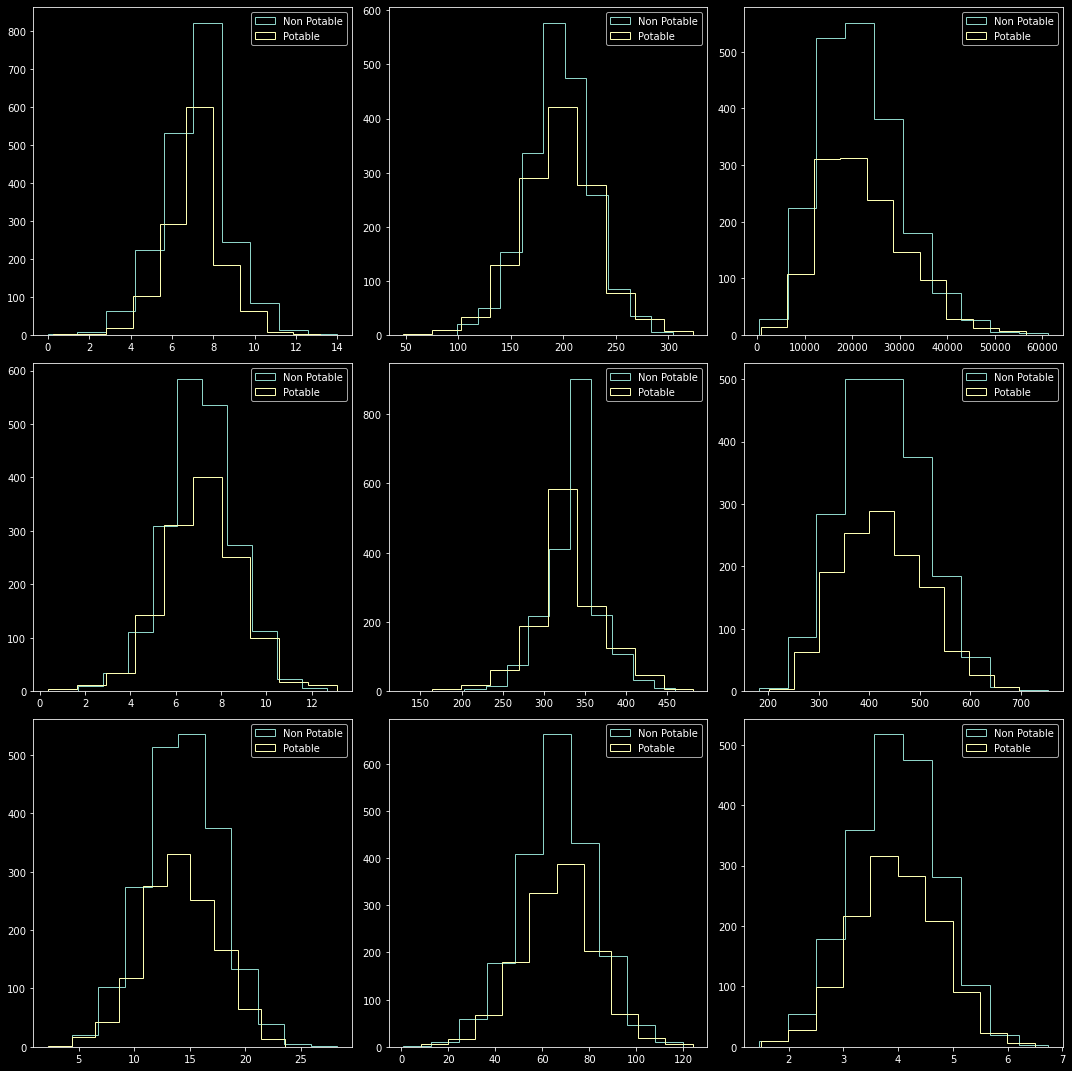

In [66]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

figure(figsize = (15, 15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3, 3, ax + 1)
    plt.hist(x = non_potable[col], label = "Non Potable", histtype='step')
    plt.hist(x = potable[col], label = "Potable", histtype='step')
    plt.legend()
plt.tight_layout()